In [13]:
# This is an example for one-port S11 measurement.
# In this example, we will load the measured S11 parameters, and convert them to Y11 parameters.

In [14]:
%matplotlib inline
import re
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.dpi'] = 300

In [15]:
def _s2y(s):
    """Convert S-parameters to Y-parameters

    Formula: :math: `y = \frac{1-s}{1+s} / 50`

    Args:
        s (complex): S-parameter to be converted

    Returns:
        complex: converted Y-parameter
    """
    y = ((1.-s) / (1.+s)) / 50.
    return y

In [16]:
# There are 2 data files, with filename patter S11_ + 2 digits + mm.csv. 
# We will use the 2 digits as data labels.
datapath = "./data/"
re_name = re.compile("S11_(\d{2})mm.csv")
file_list = os.listdir(datapath)

all_labels = []
all_data = []
for filename in file_list:
    # Check if filename matches the patter.
    re_result = re_name.search(filename)
    if re_result:
        # Get data label from the filename.
        label = int(re_result.group(1))
        data = []
        print(filename)
        # Read all data.
        with open(datapath+filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            head = next(reader)
            for row in reader:
                data.append([float(item) for item in row])
        all_labels.append(label)
        all_data.append(data)

all_data = np.array(all_data)
print(all_data.shape)

S11_06mm.csv
S11_08mm.csv
(2, 10000, 9)


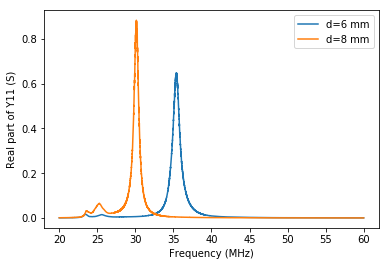

In [17]:
# Convert S11 to Y11.
s11_all = []
y11_all = []
for data in all_data:
    freq_list = data[:, 0]
    # The second column and the third column are the real part the imaginary part of S11, respectively.
    s11 = data[:, 1] + 1j * data[:, 2]
    y11 = _s2y(s11)
    s11_all.append(s11)
    y11_all.append(y11)
s11_all = np.array(s11_all)
y11_all = np.array(y11_all)

# Plot Y11.real and save the figure.
fig, ax1 = plt.subplots()
plt.xlabel("Frequency (MHz)")
plt.ylabel("Real part of Y11 (S)")
for y11 in y11_all:
    plt.plot(freq_list / 1e6, y11.real)
plt.legend(["d=" + str(label) + " mm" for label in all_labels])
plt.show()
fig.savefig("./freq_vs_Y11")